In [32]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from seaborn import objects as so

In [51]:
# https://archive.ics.uci.edu/dataset/40/flags
flags = pd.read_csv('./flags/flag.data')

landmass = {1: 'N.America', 2: 'S.America', 3: 'Europe', 4: 'Africa', 5: 'Asia', 6: 'Oceania'}
zone = {1: 'NE', 2: 'SE', 3: 'SW', 4: 'NW'}  # REGEX \=(\w{2})
language = {
    1: 'English',
    2: 'Spanish',
    3: 'French',
    4: 'German',
    5: 'Slavic',
    6: 'Other Indo-European',
    7: 'Chinese',
    8: 'Arabic',
    9: 'Japanese/Turkish/Finnish/Magyar', 10: 'Others'
}
religions = {
    0: 'Catholic', 1: 'Other Christian', 2: 'Muslim', 3: 'Buddhist', 4: 'Hindu',
               5: 'Ethnic', 6: 'Marxist', 7: 'Others'
}

flags = flags.replace({
    'landmass': landmass,
    'zone': zone,
    'language': language,
    'religion': religions
})
flags = flags.loc[:, :'religion']
flags

,name,landmass,zone,area,population,language,religion
0,Afghanistan,Asia,NE,648,16,Others,Muslim
1,Albania,Europe,NE,29,3,Other Indo-European,Marxist
2,Algeria,Africa,NE,2388,20,Arabic,Muslim
3,American-Samoa,Oceania,SW,0,0,English,Other Christian
4,Andorra,Europe,NE,0,0,Other Indo-European,Catholic
...,...,...,...,...,...,...,...
189,Western-Samoa,Oceania,SW,3,0,English,Other Christian
190,Yugoslavia,Europe,NE,256,22,Other Indo-European,Marxist
191,Zaire,Africa,SE,905,28,Others,Ethnic
192,Zambia,Africa,SE,753,6,Others,Ethnic


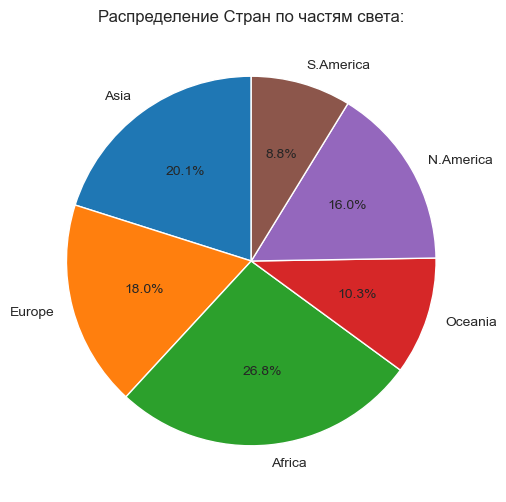

In [16]:
#Круговая диаграмма
landmass_values = Counter(flags['landmass'])
labels = landmass_values.keys()
sizes = landmass_values.values()
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Распределение Стран по частям света:')
plt.show()

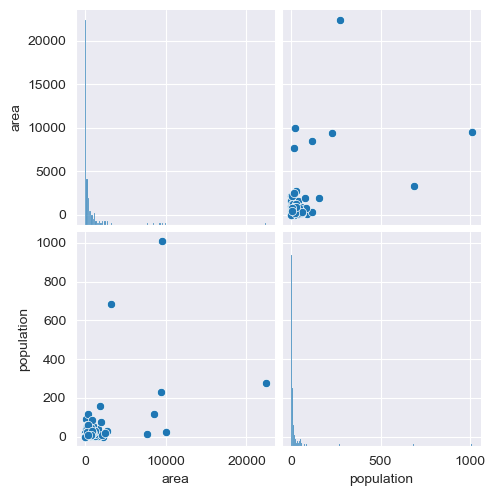

In [26]:
sns.pairplot(flags)

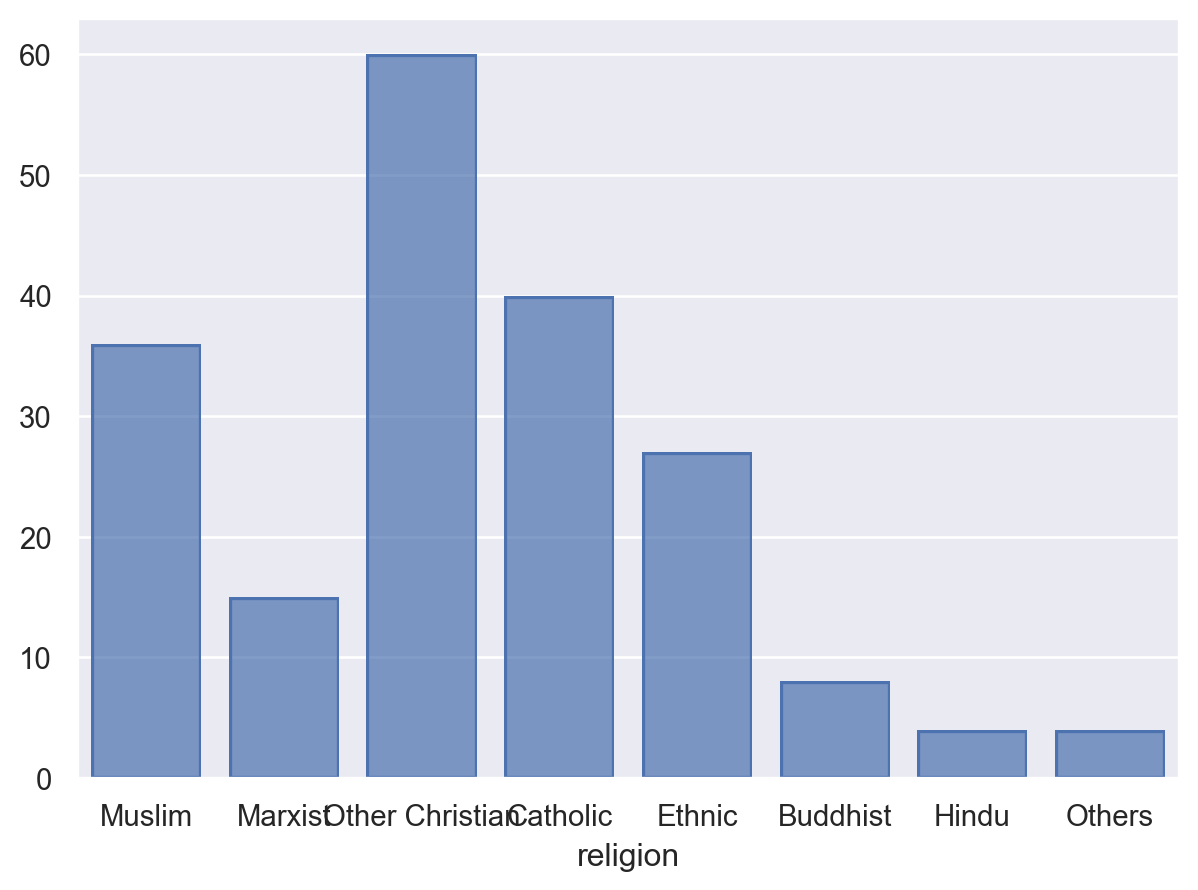

In [33]:
so.Plot(flags, x="religion").add(so.Bar(), so.Count())

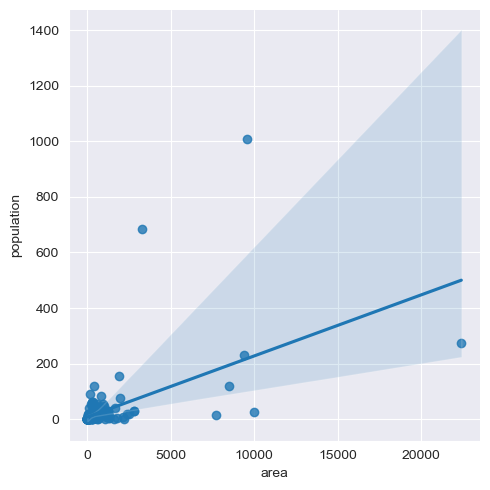

In [39]:
sns.lmplot(flags,x = 'area', y = 'population')
plt.show()

In [41]:
# """
# Выделяются аномальные значения в 4 странах.
# Население зависит от площади
# religions = {
#     0: 'Catholic', 1: 'Other Christian', 2: 'Muslim', 3: 'Buddhist', 4: 'Hindu',
#                5: 'Ethnic', 6: 'Marxist', 7: 'Others'
# }
# сделать получше. чтоб было лучше видно
# """

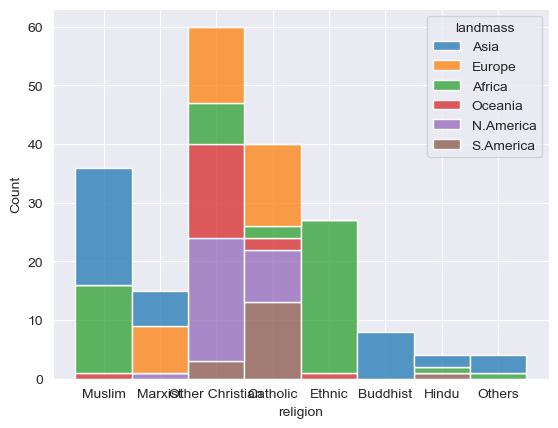

In [62]:
# flags = pd.read_csv('./flags/flag.data').replace({
#     'landmass': landmass
# })
# по графику видно, что в африке больше всего этнической религии и мусульман
# в северной америки Разные Христине - 1
# с южной америке  католиков
#
sns.histplot(data=flags, x='religion', hue='landmass', multiple='stack', bins='auto', palette='tab10')
plt.show()
# sns.kdeplot(flags, x='religion', hue='landmass', warn_singular=False)

In [76]:
# тупо сделать норм вывод
from ChernoffFace import *

In [68]:
# PART 2
orchard_sprays = pd.read_csv('../datasets/OrchardSprays.csv')
orchard_sprays

,Unnamed: 0,decrease,rowpos,colpos,treatment
0,1,57,1,1,D
1,2,95,2,1,E
2,3,8,3,1,B
3,4,69,4,1,H
4,5,92,5,1,G
...,...,...,...,...,...
59,60,14,4,8,B
60,61,86,5,8,H
61,62,55,6,8,E
62,63,3,7,8,A


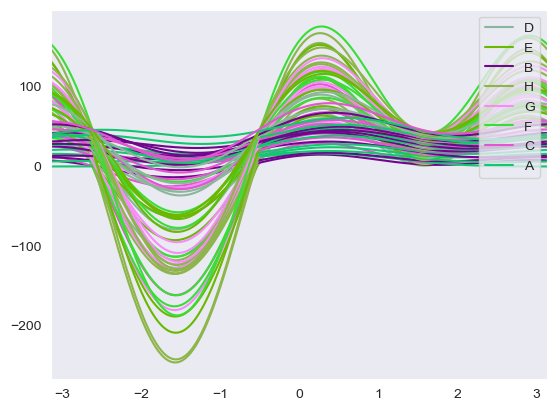

In [72]:
pd.plotting.andrews_curves(orchard_sprays, 'treatment') # todo почитать что этот график значит
plt.show()

In [73]:
from matplotlib import cm as mtcm

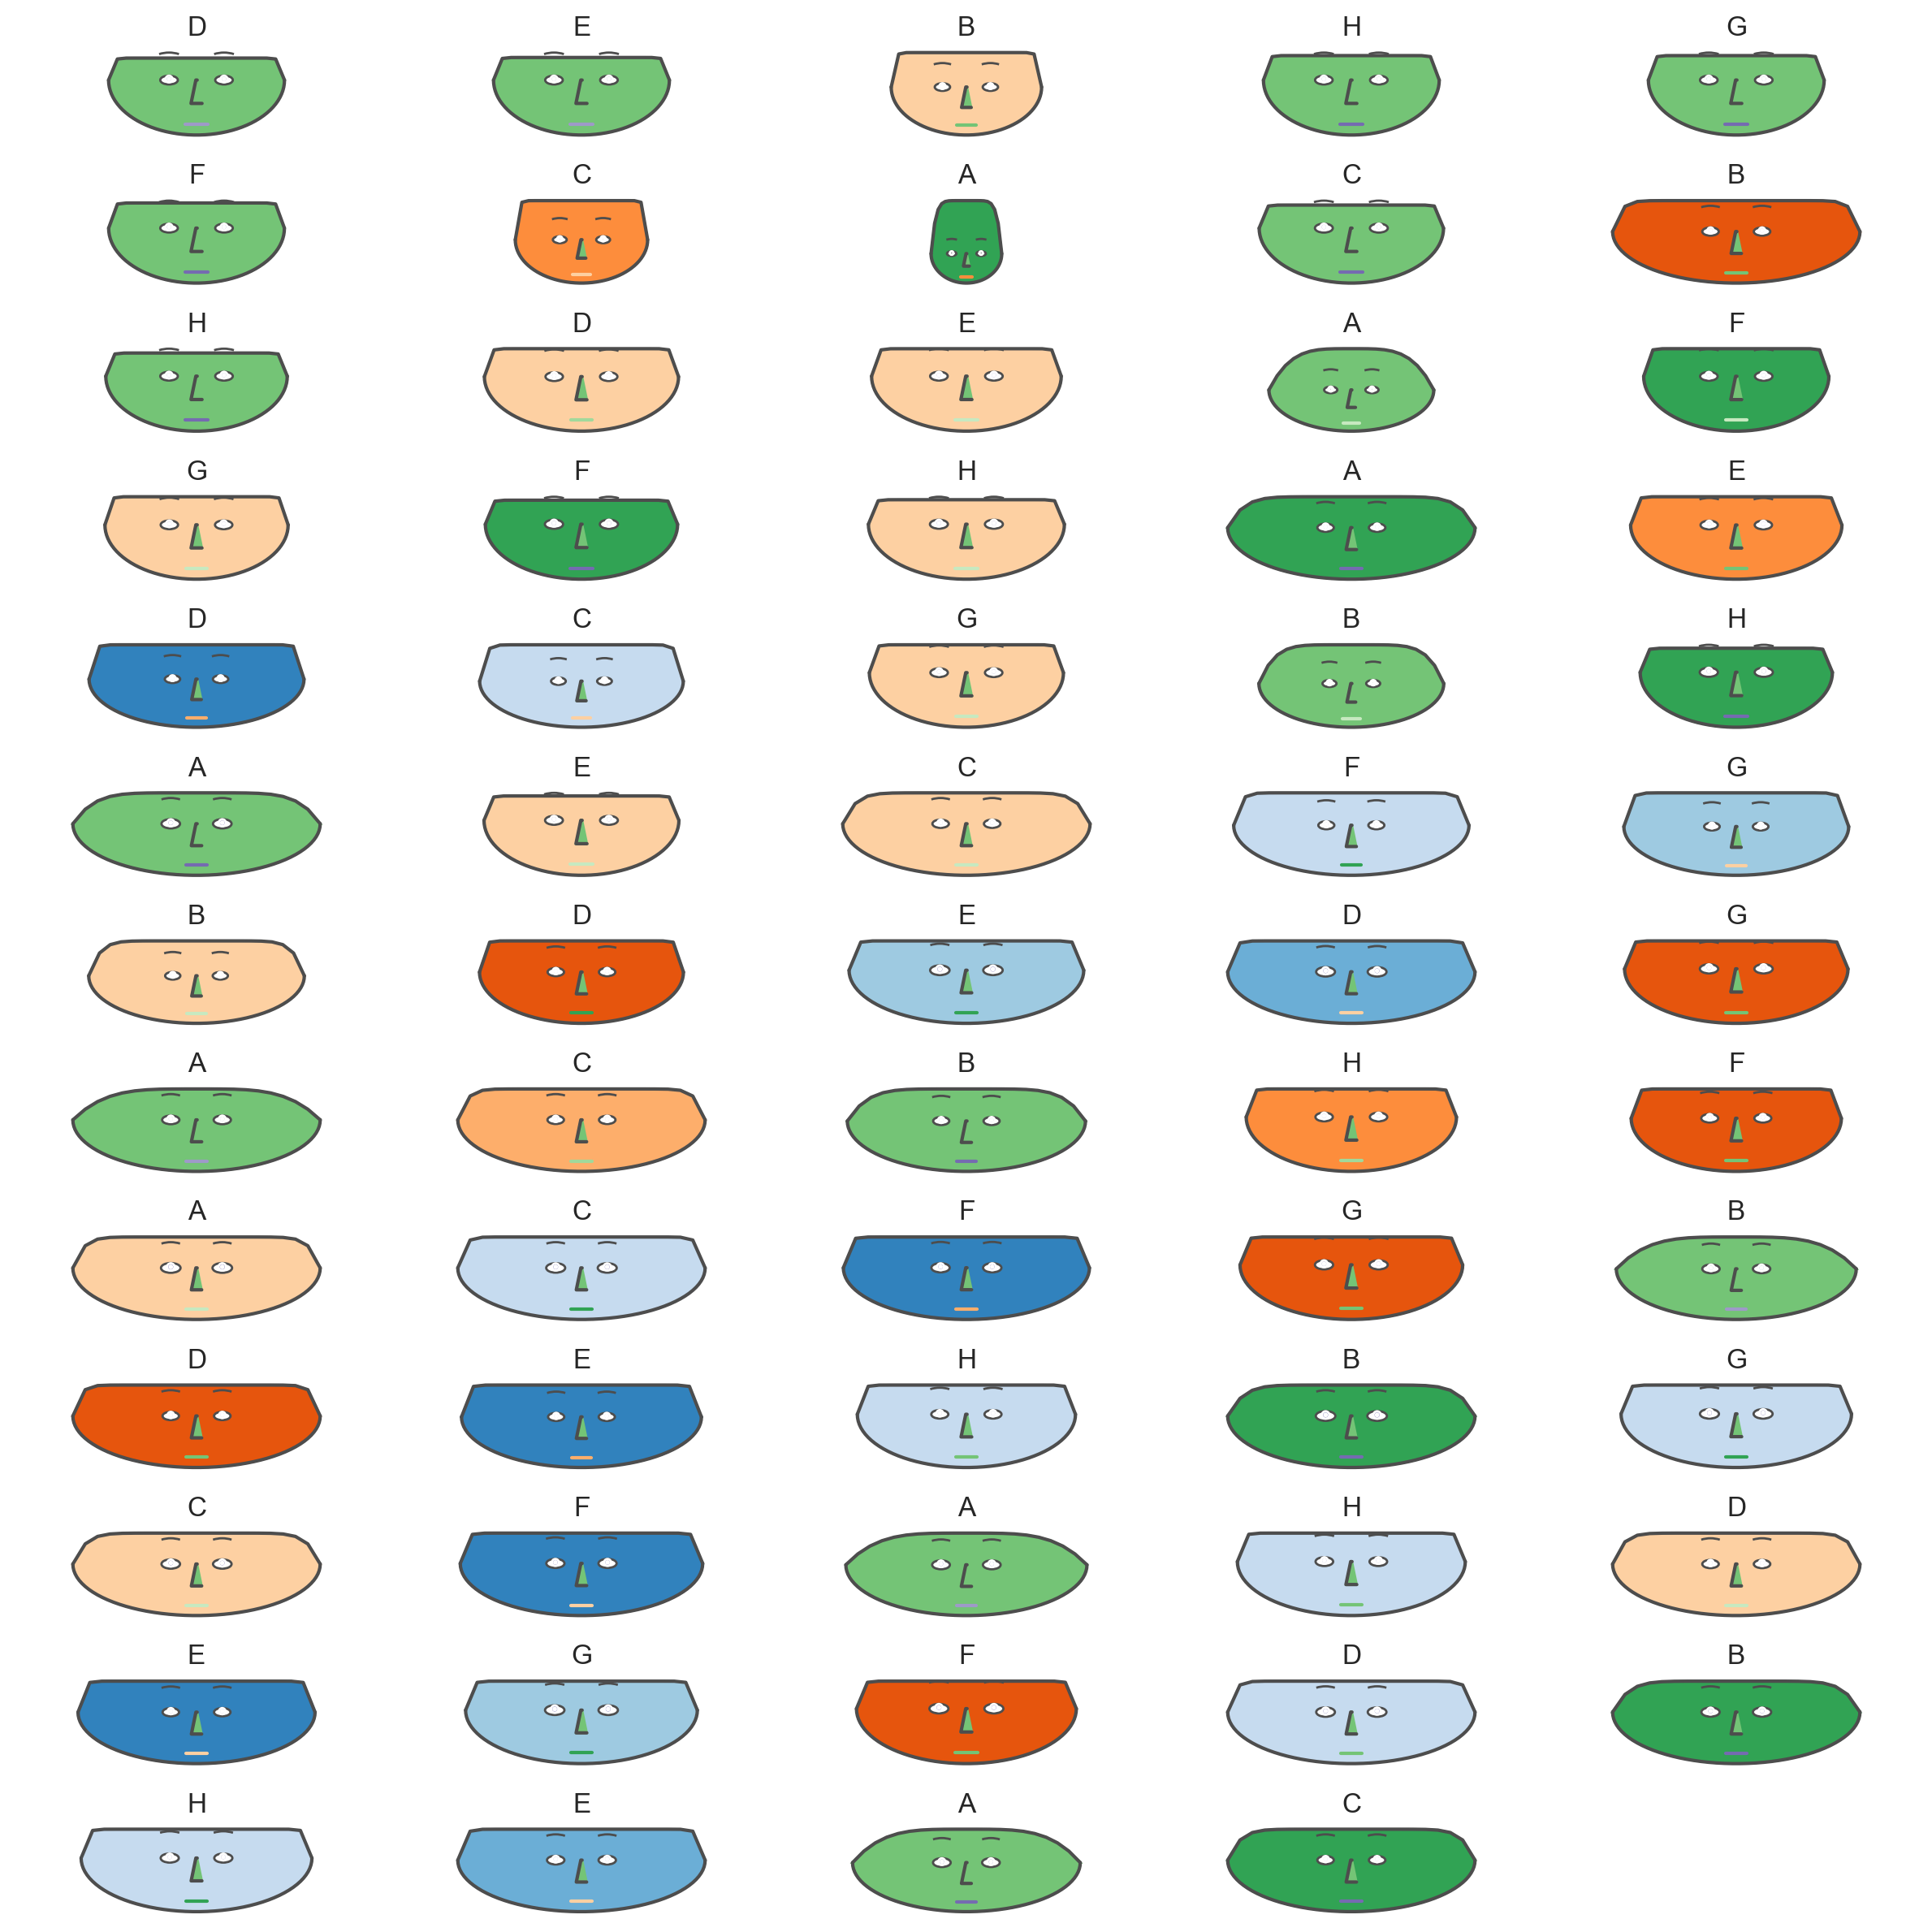

In [77]:
# почитать про лица
fig = chernoff_face(orchard_sprays, n_columns=5, long_face=False, color_mapper=mtcm.tab20c_r, figsize=(12, 12), dpi=200)
fig.tight_layout()
plt.show()